# Import Packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor

#Common Model Helpers
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import models
from keras import layers
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Conv2D, MaxPool2D, Dropout, SpatialDropout2D, BatchNormalization, Input, Activation, Dense, Flatten

Using TensorFlow backend.


# 1. Initialization of Data:

In [2]:
mnist = keras.datasets.mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [4]:
print(f'The shape of the data is {X_train_full.shape}')
print(f'The array is the following 28 * 28 = {28*28}')
print()
print(f'The datatype is the following: {X_train_full.dtype}')

The shape of the data is (60000, 28, 28)
The array is the following 28 * 28 = 784

The datatype is the following: uint8


In [5]:
print(f'Shape of training data: {X_train_full.shape}')
print()
print(f'Shape of training data: {y_train_full.shape}')

Shape of training data: (60000, 28, 28)

Shape of training data: (60000,)


### 1.1 Split Full Set into Train/Validation Sets:

In [6]:
X_train_copy = X_train_full

In [7]:
X_train_full = X_train_full.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train_full = X_train_full.astype('float32')
X_test = X_test.astype('float32')

In [8]:
X_valid = X_train_full[:5000]
X_train = X_train_full[5000:]

y_valid = y_train_full[:5000] 
y_train = y_train_full[5000:] 

In [9]:
print(f'Shape of training data after split: {X_train.shape}')
print(f'Shape of validation data after split: {X_valid.shape}')
print(f'The max pixel within the dataset is: {X_train.max()}')
print(f'The min pixel within the dataset is: {X_train.min()}')

print()
print(f'Shape of training data after split: {y_train.shape}')
print(f'Shape of validation data after split: {y_valid.shape}')

Shape of training data after split: (55000, 784)
Shape of validation data after split: (5000, 784)
The max pixel within the dataset is: 255.0
The min pixel within the dataset is: 0.0

Shape of training data after split: (55000,)
Shape of validation data after split: (5000,)


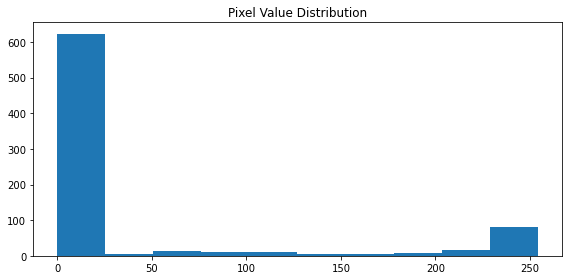

In [10]:
fig = plt.figure(figsize = (8,4))
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")

plt.tight_layout()
plt.show()

### 1.2 Normalize Data:

In [11]:
X_train = X_train /255.0 #Rescale the pixel data
X_valid = X_valid / 255.0

In [12]:
print(f'Min pixel after rescaling: {X_train.min()}')
print(f'Max pixel after rescaling : {X_train.max()}')

Min pixel after rescaling: 0.0
Max pixel after rescaling : 1.0


# 2. Image Peek:

In [13]:
class_names = [i for i in range(10)]
n_unique = np.unique(y_train)
print(f'The number of unique digits in the dataset is: {len(n_unique)}: {n_unique}')

The number of unique digits in the dataset is: 10: [0 1 2 3 4 5 6 7 8 9]


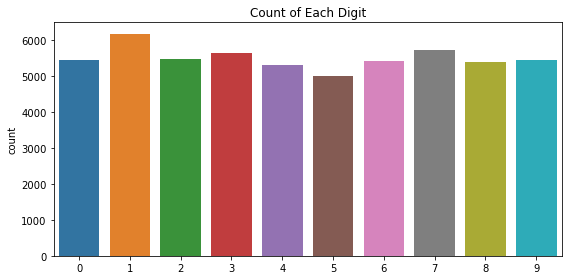

In [14]:
fig, ax = plt.subplots(figsize = (8,4))
sns.countplot(y_train)
plt.title('Count of Each Digit')

plt.tight_layout()
plt.show()

In [15]:
print(y_train[0])
print(y_train[1])
print(y_train[np.random.randint(y_train.shape[0])])

7
3
4


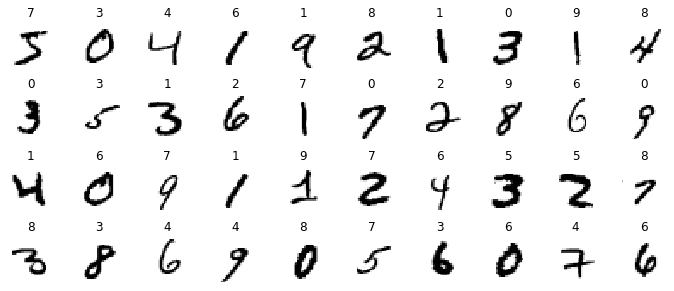

In [16]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_copy[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# 3. Modelling:

### 3.1 Three-Layer Sequential Model:

In [17]:
simple_model = keras.models.Sequential([
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [18]:
simple_model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [19]:
simple_history = simple_model.fit(X_train,y_train, validation_data = (X_valid, y_valid), epochs = 10)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 10s 177us/step - loss: 0.6015 - accuracy: 0.8439 - val_loss: 0.3085 - val_accuracy: 0.9124
Epoch 2/10
55000/55000 [==============================] - 9s 170us/step - loss: 0.2897 - accuracy: 0.9176 - val_loss: 0.2386 - val_accuracy: 0.9344
Epoch 3/10
55000/55000 [==============================] - 9s 164us/step - loss: 0.2358 - accuracy: 0.9331 - val_loss: 0.2023 - val_accuracy: 0.9414
Epoch 4/10
55000/55000 [==============================] - 9s 160us/step - loss: 0.2018 - accuracy: 0.9430 - val_loss: 0.1775 - val_accuracy: 0.9524
Epoch 5/10
55000/55000 [==============================] - 9s 156us/step - loss: 0.1759 - accuracy: 0.9499 - val_loss: 0.1591 - val_accuracy: 0.9554
Epoch 6/10
55000/55000 [==============================] - 10s 175us/step - loss: 0.1561 - accuracy: 0.9556 - val_loss: 0.1452 - val_accuracy: 0.9588
Epoch 7/10
55000/55000 [==============================] - 9s 

In [20]:
simple_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


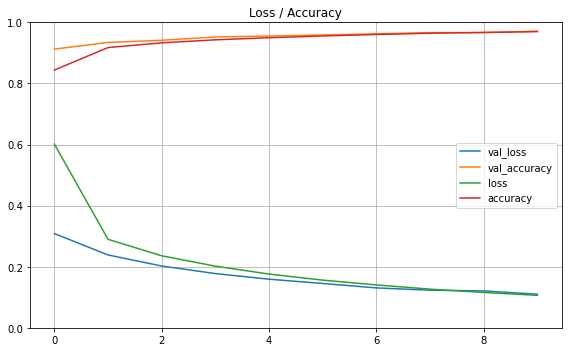

In [21]:
pd.DataFrame(simple_history.history).plot(figsize=(8, 5))
plt.title('Loss / Accuracy')
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.tight_layout()
plt.show()

In [22]:
simple_predictions = simple_model.predict(X_test)

In [23]:
loss_metrics_simple = simple_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 67us/step


In [24]:
print(f'Loss, {round(loss_metrics_simple[0],4)}')
print(f'Test Accuracy, {round(loss_metrics_simple[1],4)}')

Loss, 17.8907
Test Accuracy, 0.9621


In [25]:
simple_y_pred = simple_model.predict_classes(X_test)
simple_y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

### 3.2 N-Layer Sequential Model:

In [26]:
def build_model(n_hidden=1, n_neurons=30):
    model = keras.models.Sequential()
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(10,activation = 'softmax'))
    model.compile(loss="sparse_categorical_crossentropy", optimizer='sgd',metrics = ['accuracy'])
    return model

In [27]:
complex_model = build_model(n_hidden = 8, n_neurons = 200)
complexmodel = complex_model.fit(X_train,y_train,epochs = 30, validation_data = (X_valid,y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 15s 281us/step - loss: 1.0104 - accuracy: 0.6904 - val_loss: 0.3068 - val_accuracy: 0.9076
Epoch 2/30
55000/55000 [==============================] - 15s 269us/step - loss: 0.2461 - accuracy: 0.9261 - val_loss: 0.2810 - val_accuracy: 0.9172
Epoch 3/30
55000/55000 [==============================] - 16s 282us/step - loss: 0.1643 - accuracy: 0.9502 - val_loss: 0.1503 - val_accuracy: 0.9536
Epoch 4/30
55000/55000 [==============================] - 15s 270us/step - loss: 0.1251 - accuracy: 0.9622 - val_loss: 0.1188 - val_accuracy: 0.9652
Epoch 5/30
55000/55000 [==============================] - 15s 274us/step - loss: 0.0999 - accuracy: 0.9694 - val_loss: 0.0997 - val_accuracy: 0.9714
Epoch 6/30
55000/55000 [==============================] - 16s 283us/step - loss: 0.0840 - accuracy: 0.9739 - val_loss: 0.0902 - val_accuracy: 0.9738
Epoch 7/30
55000/55000 [==============================] -

In [28]:
complex_predictions = complex_model.predict(X_test)

In [29]:
loss_metrics_complex = complex_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 90us/step


In [30]:
print(f'Loss, {round(loss_metrics_complex[0],4)}')
print(f'Test Accuracy, {round(loss_metrics_complex[1],4)}')

Loss, 20.0327
Test Accuracy, 0.9693


In [31]:
complex_y_pred = complex_model.predict_classes(X_test)
complex_y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

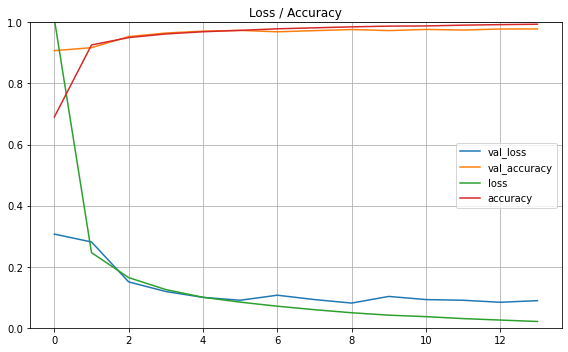

In [32]:
pd.DataFrame(complexmodel.history).plot(figsize=(8, 5))
plt.title('Loss / Accuracy')
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.tight_layout()
plt.show()

### 3.3 ConvNet:

In [33]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(55000, 784)
(5000, 784)
(55000,)
(5000,)
(10000, 784)
(10000,)


In [34]:
X_train = X_train.reshape((55000,28,28,1))
X_valid = X_valid.reshape((5000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

In [35]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(55000, 28, 28, 1)
(5000, 28, 28, 1)
(55000,)
(5000,)
(10000, 28, 28, 1)
(10000,)


In [36]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [37]:
model.fit(X_train,y_train,epochs = 30, validation_data = (X_valid,y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 69s 1ms/step - loss: 0.1438 - accuracy: 0.9557 - val_loss: 0.0568 - val_accuracy: 0.9828
Epoch 2/30
55000/55000 [==============================] - 69s 1ms/step - loss: 0.0449 - accuracy: 0.9860 - val_loss: 0.0471 - val_accuracy: 0.9874
Epoch 3/30
55000/55000 [==============================] - 68s 1ms/step - loss: 0.0312 - accuracy: 0.9905 - val_loss: 0.0427 - val_accuracy: 0.9894
Epoch 4/30
55000/55000 [==============================] - 68s 1ms/step - loss: 0.0242 - accuracy: 0.9929 - val_loss: 0.0423 - val_accuracy: 0.9894
Epoch 5/30
55000/55000 [==============================] - 67s 1ms/step - loss: 0.0209 - accuracy: 0.9943 - val_loss: 0.0560 - val_accuracy: 0.9864
Epoch 6/30
55000/55000 [==============================] - 68s 1ms/step - loss: 0.0169 - accuracy: 0.9952 - val_loss: 0.0434 - val_accuracy: 0.9914
Epoch 7/30
55000/55000 [==============================] - 69s 1ms/ste

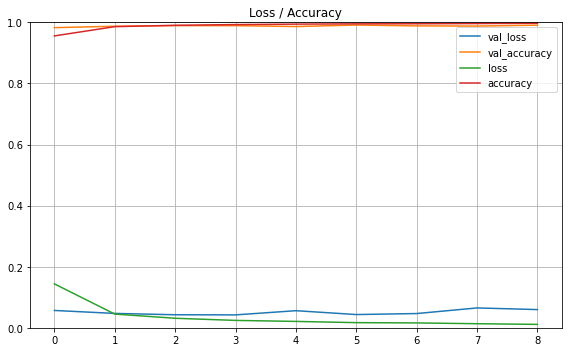

In [38]:
pd.DataFrame(model.history.history).plot(figsize=(8, 5))
plt.title('Loss / Accuracy')
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.tight_layout()
plt.show()

In [39]:
test_loss, test_acc = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 331us/step


In [40]:
print(test_acc)

0.9799000024795532


# 4. ConvNet with Kaggle Data:

In [41]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [42]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [43]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
train.isna().sum().sum()

0

In [46]:
test.isna().sum().sum()

0

In [47]:
y = train['label']

In [48]:
train = train.drop('label',axis = 1)

In [49]:
print(train.shape)
print(test.shape)

(42000, 784)
(28000, 784)


In [50]:
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
train = train.to_numpy()
test = test.to_numpy()

In [53]:
print(train.max())
print(train.min())

255
0


In [54]:
train = train.reshape((42000, 28, 28, 1))
train = train / 255.0

test = test.reshape((28000, 28, 28, 1))
test = test / 255.0

In [55]:
X_train, X_valid, y_train, y_valid = train_test_split(train, y, test_size=0.20, train_size=0.80, random_state=42)

In [56]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
(33600,)
(8400,)


In [57]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (1,1), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [58]:
model.fit(X_train,y_train,epochs = 30, validation_data = (X_valid,y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 43s 1ms/step - loss: 0.2951 - accuracy: 0.9053 - val_loss: 0.1055 - val_accuracy: 0.9663
Epoch 2/30
33600/33600 [==============================] - 42s 1ms/step - loss: 0.0918 - accuracy: 0.9732 - val_loss: 0.1257 - val_accuracy: 0.9625
Epoch 3/30
33600/33600 [==============================] - 42s 1ms/step - loss: 0.0624 - accuracy: 0.9810 - val_loss: 0.0686 - val_accuracy: 0.9805
Epoch 4/30
33600/33600 [==============================] - 42s 1ms/step - loss: 0.0490 - accuracy: 0.9851 - val_loss: 0.0575 - val_accuracy: 0.9825
Epoch 5/30
33600/33600 [==============================] - 42s 1ms/step - loss: 0.0382 - accuracy: 0.9891 - val_loss: 0.0557 - val_accuracy: 0.9843
Epoch 6/30
33600/33600 [==============================] - 42s 1ms/step - loss: 0.0336 - accuracy: 0.9902 - val_loss: 0.0748 - val_accuracy: 0.9810
Epoch 7/30
33600/33600 [==============================] - 42s 1ms/ste

# 5. Dropout - Data Augmentation:

In [59]:
def build_model():
        model = Sequential()
                
        model.add(layers.Conv2D(64, (3, 3), activation='relu',padding = 'same', input_shape=(28, 28, 1)))
                                       
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(SpatialDropout2D(0.25))
        
        model.add(Conv2D(filters=64,kernel_size=(6,6),padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        
        model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(SpatialDropout2D(0.25))
        
        model.add(MaxPool2D(pool_size=(2,2)))
        model.add(Dropout(0.25))
        
        model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(SpatialDropout2D(0.25))
        
        model.add(Conv2D(filters=128,kernel_size=(6,6),padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        
        model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(SpatialDropout2D(0.25))
        
        model.add(MaxPool2D(pool_size=(2,2)))
        model.add(Dropout(0.25))
        
        model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(SpatialDropout2D(0.25))
        
        model.add(Conv2D(filters=256,kernel_size=(6,6),padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        
        model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(SpatialDropout2D(0.25))
        
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))
        model.add(Dropout(0.25))
        
        model.add(Conv2D(filters=32,kernel_size=(2,2),padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(SpatialDropout2D(0.25))
        
        model.add(Flatten())
        
        model.add(Dense(256))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.25))
        
        model.add(Dense(10))
        model.add(Activation("softmax"))
        
        optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
        model.compile(optimizer = 'rmsprop' ,metrics=["accuracy"], loss = "sparse_categorical_crossentropy")
        
        return model

In [60]:
model = build_model()

In [61]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.1,
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)
datagen.fit(X_train)

In [62]:
callback_lr = ReduceLROnPlateau(monitor='val_acc',patience=2,factor=0.5,min_lr=0.00001,verbose=1)
epochs = 1
batch_size = 256

In [63]:
history = model.fit_generator(datagen.flow(X_train,y_train),epochs = epochs, validation_data = (X_valid,y_valid),
                              verbose = 1, callbacks=[callback_lr])

Epoch 1/1
1050/1050 [==============================] - 2276s 2s/step - loss: 0.4294 - accuracy: 0.8704 - val_loss: 0.0692 - val_accuracy: 0.9838


C:\Users\jeffr\Anaconda3\envs\tf\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


# 6. Machine Learning:

In [64]:
print(X_train.shape)
print(X_valid.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)


In [65]:
x_train = X_train.reshape((33600, 28*28))
x_valid = X_valid.reshape((8400, 28*28))

In [66]:
x_test = test.reshape((28000, 28*28))

In [67]:
forest = RandomForestClassifier(n_estimators = 100)

forest.fit(x_train, y_train)
forest_predictions = forest.predict(x_train)

print("\nAccuracy Score for Random Forest Classifier is: " + str(forest.score(x_valid, y_valid)))


Accuracy Score for Random Forest Classifier is: 0.9623809523809523


In [68]:
results = forest.predict(x_test)

In [69]:
pred = pd.Series(results,name="Label")

In [70]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_rf.csv",index=False)

# 7. Submission:

In [71]:
sample = pd.read_csv('sample_submission.csv')

In [72]:
sample.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [73]:
predictions = model.predict(test)

In [74]:
predictions = np.argmax(predictions,axis = 1)

In [75]:
predictions = pd.Series(predictions,name="Label")

In [76]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predictions],axis = 1)

submission.to_csv("cnn_mnist.csv",index=False)